# Nutrient (N, P, Fe) distribution - draft 2

Here I plot the nutrients N, P, and Fe that were simulated by the Darwin global model (Dutkiewicz et al., 2019).

I calculate the nutrient supply ratios phi(P:N) (1) and phi(Fe:N) (2), which are used to describe the excess P and Fe supply. These are the ratio of the gross delivery rate of phosphorus and iron, relative to the gross delivery rate of bioavailable nitrogen, normalized by estimated P:N or Fe:N ratio of nondiazotrophic phytoplankton community (Ward et al., 2013).

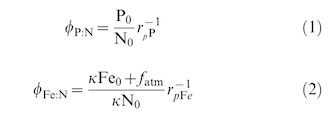

Based Dutkiewicz et al. (2019), I included all nutrient fluxes of dissolved nitrogen, phosphate, or iron to the model surface 100m. In other words, transport terms and remineralization terms.\
Assumptions:

- Integrate over top 100m (= first 6 depth levels of the model)
- Multiply each box with its dz --> get mmol/m2/s
- Multiply with seconds per year --> get mmol/m2/y
- Sum up transport terms and remineralization terms; iron dust deposition is included in Nutr['S_Fe']
- Also show transport and remin terms alone

#### Load requirements and set switches

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# iron dust flux
fein = np.fromfile('/Users/meilers/MITinternship/Data/mahowald2009_solubile_current_smooth_oce_mth-2d.bin', '>f4').reshape(12,160,360)

# model simulation output
Nutr = xr.open_dataset('/Users/meilers/MITinternship/Data/Nutr_tend.0000014400.nc')

grid = xr.open_dataset('/Users/meilers/MITinternship/Data/supply50m.nc')
area_info = xr.open_dataset('/Users/meilers/MITinternship/Data/grid.nc')

lon = grid.lon   #needed for plotting
lat = grid.lat    #needed for plotting

area = area_info.rA    #area needed to calculate difference in predicted biome area

#### Import diazotroph observational data

In [3]:
# Load and condense diazotroph data
ds = xr.open_dataset('/Users/meilers/MITinternship/Data/MarEDat20130403Diazotrophs.nc',decode_times=False)

# extract variables which are needed and convert/integrate
lon_d = ds['LONGITUDE']
lat_d = ds['LATITUDE'][10:-10] # to match the latitude of the nutrient data

obs = ds['OBSERVATIONS']
abund = ds['ABUNDANCE']
bm = ds['BIOMASS']
nifH = ds['nifHbiom']
nz_obs = ds['NON_ZERO_OBS']
nz_abund = ds['NON_ZERO_ABUND']
nz_bm = ds['NON_ZERO_BIOM']
nz_nifH = ds['NON_ZERO_nifH']

obs_tot = np.sum(obs[:,0:6,10:-10,:],axis=(0,1))
abund_tot = np.sum(abund[:,0:6,10:-10,:],axis=(0,1))
bm_tot = np.sum(bm[:,0:6,10:-10,:],axis=(0,1))
nifH_tot = np.sum(nifH[:,0:6,10:-10,:],axis=(0,1))
nz_obs_tot = np.sum(nz_obs[:,0:6,10:-10,:],axis=(0,1))
nz_abund_tot = np.sum(nz_abund[:,0:6,10:-10,:],axis=(0,1))
nz_bm_tot = np.sum(nz_bm[:,0:6,10:-10,:],axis=(0,1))
nz_nifH_tot = np.sum(nz_nifH[:,0:6,10:-10,:],axis=(0,1))

#### Import nutrient (model) data

In [4]:
# Load and condense nutrient data
# transport terms
NH4 = Nutr['gTr02']
NO2 = Nutr['gTr03']
NO3 = Nutr['gTr04']
PO4 = Nutr['gTr05']
FeT = Nutr['gTr07']

# other terms: remineralization and dust in case of Fe
S_DIN = Nutr['S_DIN']
S_PO4 = Nutr['S_PO4']
S_Fe = Nutr['S_Fe']

#reducing the T dimension (which is 1 anyway)
NH4 = NH4[0,:,:,:]
NO2 = NO2[0,:,:,:]
NO3 = NO3[0,:,:,:]
PO4 = PO4[0,:,:,:]
FeT = FeT[0,:,:,:]

S_DIN = S_DIN[0,:,:,:]
S_PO4 = S_PO4[0,:,:,:]
S_Fe = S_Fe[0,:,:,:]

# define constants and dz
sec = 31557600  #seconds per year (365.25*86400)
dz = [10,10,15,20,20,25] #,35,50,75,100] #(...) dz between two depth layers

Sum nutrients up over depth and multiply with corresponding dz and sec

In [5]:
NH4_int = np.zeros((6,160,360))
for i in range(len(dz)):
    NH4_int[i,:,:] = NH4[i,:,:]*dz[i]*sec
    #print(np.max(NH4_int[i,:,:]))
    #print(i)
NH4_int = np.sum(NH4_int,axis=0)

NO2_int = np.zeros((6,160,360))
for i in range(len(dz)):
    NO2_int[i,:,:] = NO2[i,:,:]*dz[i]*sec    
NO2_int = np.sum(NO2_int,axis=0)
 
NO3_int = np.zeros((6,160,360))
for i in range(len(dz)):
    NO3_int[i,:,:] = NO3[i,:,:]*dz[i]*sec    
NO3_int = np.sum(NO3_int,axis=0)

PO4_int = np.zeros((6,160,360))
for i in range(len(dz)):
    PO4_int[i,:,:] = PO4[i,:,:]*dz[i]*sec    
PO4_int = np.sum(PO4_int,axis=0)

FeT_int = np.zeros((6,160,360))
for i in range(len(dz)):
    FeT_int[i,:,:] = FeT[i,:,:]*dz[i]*sec    
FeT_int = np.sum(FeT_int,axis=0)

S_DIN_int = np.zeros((6,160,360))
for i in range(len(dz)):
    S_DIN_int[i,:,:] = S_DIN[i,:,:]*dz[i]*sec    
S_DIN_int = np.sum(S_DIN_int,axis=0)

S_PO4_int = np.zeros((6,160,360))
for i in range(len(dz)):
    S_PO4_int[i,:,:] = S_PO4[i,:,:]*dz[i]*sec    
S_PO4_int = np.sum(S_PO4_int,axis=0)

S_Fe_int = np.zeros((6,160,360))
for i in range(len(dz)):
    S_Fe_int[i,:,:] = S_Fe[i,:,:]*dz[i]*sec    
S_Fe_int = np.sum(S_Fe_int,axis=0)

Add up the different N species

In [6]:
N_int = NH4_int + NO3_int + NO2_int
N_int_o = S_DIN_int

(The next step is actually not necessary. It's a relict from the coding process and now just allows to rename the varialbes.)

In [7]:
from copy import deepcopy
N_trans = deepcopy(N_int)
P_trans = deepcopy(PO4_int)
Fe_trans = deepcopy(FeT_int)
N_remin = deepcopy(N_int_o)
P_remin = deepcopy(S_PO4_int)
Fe_other = deepcopy(S_Fe_int)

Define transport, remineralization and nutrient fluxes; add iron flux

In [8]:
f_dust = np.sum(fein,axis=0)*sec # only needed to calculate the Fe remineraliztion
                                 # Fe_other contains dust. If we need Fe remin only: subtract dust
Fe_remin = Fe_other-f_dust

N_tot = np.add(N_trans,N_remin)
P_tot = np.add(P_trans,P_remin)
Fe_tot = np.add(Fe_trans,Fe_other)#,f_dust) #including dust

Reminder: now we have the following variables: 
- N_tot, P_tot, Fe_tot
- N_trans, P_trans, Fe_trans 
- N_remin, P_remin, Fe_remin

Calculate ratios:

In [9]:
# Bioavailable nutrient supply --> bio_PN, bio_FeN
# Constants
rpP = 0.0625
rpFe = 6.25e-5
k = 0.1

bio_PN_tot = (np.divide(P_tot,N_tot))*(1/rpP)
bio_FeN_tot = (np.divide(Fe_tot,N_tot))*(1/rpFe)

bio_PN_trans = (np.divide(P_trans,N_trans))*(1/rpP)
F = np.add((Fe_trans*k),f_dust*100)
bio_FeN_trans = (np.divide(F,(N_trans*k)))*(1/rpFe)

bio_PN_remin = (np.divide(P_remin,N_remin))*(1/rpP)
bio_FeN_remin = (np.divide(Fe_remin,N_remin))*(1/rpFe)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Calculate **differences in area** for P:N of 0.99 to 1.04 - or any other value

In [10]:
ref_PN = 1.04 # choose the reference value for the P:N ratio here (Ward et al. is 1.04)
ref_FeN = 1.2
new_PN = 0.99 # choose the new ratio for the comparison here
new_FeN = 2.5

PN_area_ref = np.zeros((len(lat),len(lon)))
PN_bool_ref = np.where(bio_PN_tot[:,:] > ref_PN, 1, 0)
PN_A_ref = np.nansum(PN_bool_ref[:,:]*area,axis=(0,1))


PN_area_new = np.zeros_like(PN_area_ref)
PN_bool_new = np.where(bio_PN_tot[:,:] > new_PN, 1, 0)
PN_A_new = np.nansum(PN_bool_new[:,:]*area,axis=(0,1))

change = (PN_A_ref-PN_A_new)/PN_A_ref

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


Create a mask where P:N and Fe:N are sufficient to support diazotrophs

In [11]:
mask = np.where((bio_FeN_tot[:,:] > ref_FeN) & (bio_PN_tot[:,:] > ref_PN), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


Manipulate diazotroph data (convert the boolean presence/absence masks)

In [12]:
# Create a mask of the provinces where diazotrophs are predicted from nutrient ratios        
diaz_obs = np.zeros_like(obs_tot)
diaz_obs[obs_tot>0] = 1

diaz_abund = np.zeros_like(abund_tot)
diaz_abund[abund_tot>0] = 1

diaz_bm = np.zeros_like(bm_tot)
diaz_bm[bm_tot>0] = 1

diaz_nifH = np.zeros_like(nifH_tot)
diaz_nifH[nifH_tot>0] = 1

diaz_nz_obs = np.zeros_like(nz_obs_tot)
diaz_nz_obs[nz_obs_tot>0] = 1

diaz_nz_abund = np.zeros_like(nz_abund_tot)
diaz_nz_abund[nz_abund_tot>0] = 1

diaz_nz_bm = np.zeros_like(nz_bm_tot)
diaz_nz_bm[nz_bm_tot>0] = 1

diaz_nz_nifH = np.zeros_like(nz_nifH_tot)
diaz_nz_nifH[nz_nifH_tot>0] = 1

find_obs = np.where(diaz_obs==1)
find_abund = np.where(diaz_abund==1)
find_bm = np.where(diaz_bm==1)
find_nifH = np.where(diaz_nifH==1)
find_nz_obs = np.where(diaz_nz_obs==1)
find_nz_abund = np.where(diaz_nz_abund==1)
find_nz_bm = np.where(diaz_nz_bm==1)
find_nz_nifH = np.where(diaz_nz_nifH==1)

#pack the masks for the different diazotroph variables into one list
diaz_data_list = [find_obs,find_abund,find_bm,find_nifH,find_nz_obs,find_nz_abund,find_nz_bm,find_nz_nifH]

In [13]:
#%% Calculate absences --> meaning obs - nz_obs
#absences = np.where(find_obs[0]==1 & find_nz_obs[0]==0)
#absence = np.where(find_obs[0][:] != find_nz_obs[0][:])

#maybe write a loop?


Quantify how many of the diazotrophs abundances are in the predicted province.\
Careful: make sure to get lon/lat of nutrients and diazotrophs consistent!!!
Correct the two scales of latitude to match one another. (lon would be the same but to avoid confusion I converted it too.) All we care about here is getting the right indices matching the lon, lat of both, diazotroph and nutrient data. 

In [14]:
list_idx = 1 #to chose which data from diaz_data_list to plot

lat_corr = diaz_data_list[list_idx][0]
lon_corr = (diaz_data_list[list_idx][1]-180)%360
# gives fraction of abundances that are within the predicted province
IN = np.sum(mask[lat_corr,lon_corr])/len(lat_corr)
print(IN)

0.7230142566191446


Quick plot (map) for whatever variable...

...right now it shows the combined area of P:N and Fe:N that allow for diazotroph abundance.


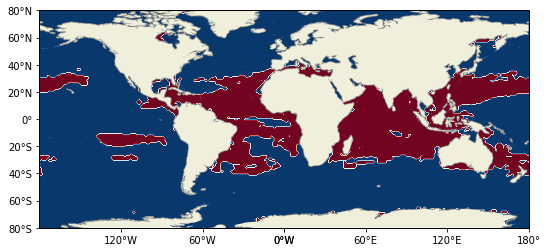

In [15]:
col = plt.get_cmap('RdBu_r')

# right now it shows the combined area of P:N and Fe:N that allow for diazotroph abundance.
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)},figsize=(12,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor=cfeature.COLORS['land']))
c = ax.contourf(lon,lat,mask,levels=np.linspace(0,1,30),cmap=col)#,extend='both')
#con = ax.contour(lon,lat,mask,color='r')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
#cbar = plt.colorbar(c,ax=ax)
#cbar.set_label('transport '+str(label_nut[nut])+'',rotation=90, position=(0.5,0.5))
plt.show()

Compare to Dutkiewicz et al., 2019:

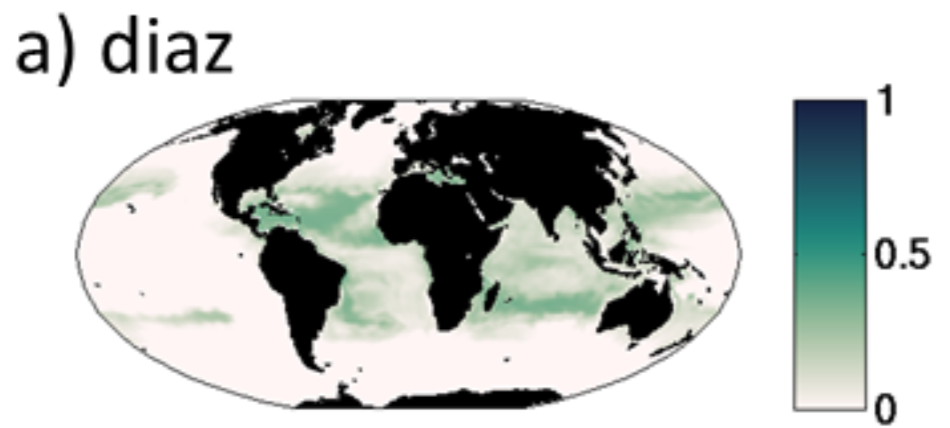

Plot the nutrient ratios:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'linstyle'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


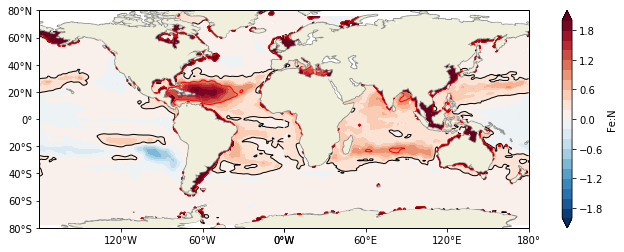

In [16]:
nu = 1   #chose nutrient here: 0=Fe, 1=N, 2=P
nutr = [bio_PN_tot,bio_FeN_tot,bio_PN_trans,bio_FeN_trans,bio_PN_remin,bio_FeN_remin]
label_nut = ['N (mol/m$^{2}$/y)','P (mol/m$^{2}$/y)','Fe (mol/m$^{2}$/y)']
name_nut = ['P:N','Fe:N','transport P:N','transport Fe:N','remin P:N','remin Fe:N']

levs_PN = np.linspace(0,1000,11)
levs_FeN = np.linspace(-2,2,21)
levs = [levs_PN,levs_FeN,levs_PN,levs_FeN,levs_PN,levs_FeN]

colmap = plt.get_cmap('RdBu_r')

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)},figsize=(12,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor=cfeature.COLORS['land']))
c = ax.contourf(lon,lat,np.log(nutr[nu]),levels=levs[nu],cmap=colmap,extend='both')
con1 = ax.contour(lon,lat,nutr[nu],levels=[1.2],colors='k',linewidths=1,linstyle='solid')
con2 = ax.contour(lon,lat,nutr[nu],levels=[2.5],colors='r',linewidths=1,linstyle='solid')

#plt.plot(lon_d[find_obs[1]],lat_d[find_obs[0]],'.',color='b')
#plt.plot(lon_d[find_abund[1]],lat_d[find_abund[0]],'.',color='g')
#plt.plot(lon_d[find_bm[1]],lat_d[find_bm[0]],'.',color='r')
#plt.plot(lon_d[find_nifH[1]],lat_d[find_nifH[0]],'.',color='c')
#plt.plot(lon_d[find_nz_obs[1]],lat_d[find_nz_obs[0]],'.',color='m')
#plt.plot(lon_d[find_nz_abund[1]],lat_d[find_nz_abund[0]],'.',color='orange')
#plt.plot(lon_d[find_nz_bm[1]],lat_d[find_nz_bm[0]],'.',color='k')
#plt.plot(lon_d[find_nz_nifH[1]],lat_d[find_nz_nifH[0]],'.',color='w')

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
cbar = plt.colorbar(c,ax=ax)
cbar.set_label(''+str(name_nut[nu])+'',rotation=90, position=(0.5,0.5))
plt.show()
#fig.savefig('/Users/meilers/MITinternship/Plots/darfts_trans_NO3_fixed.png', bbox_inches='tight', dpi=300)


Compare to Dutkiewicz et al., 2019:

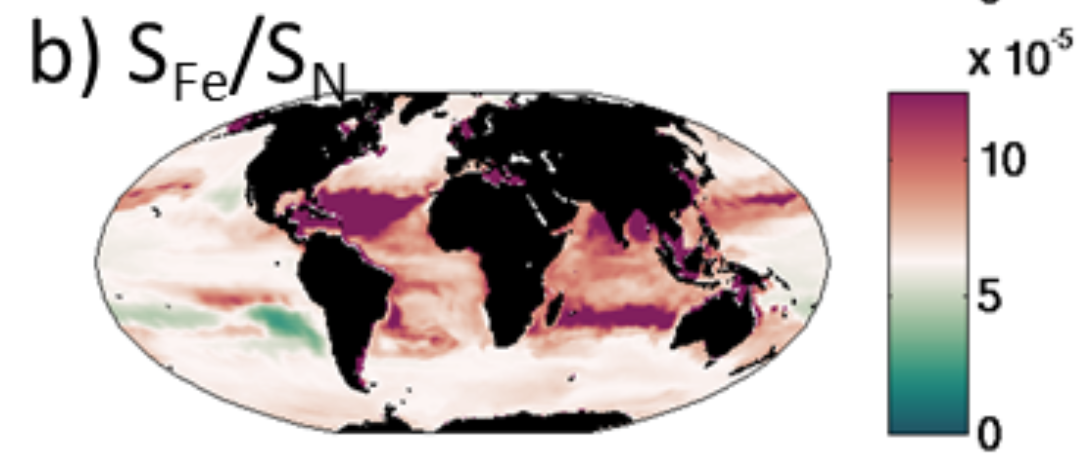

Compare to Ward et al., 2013:

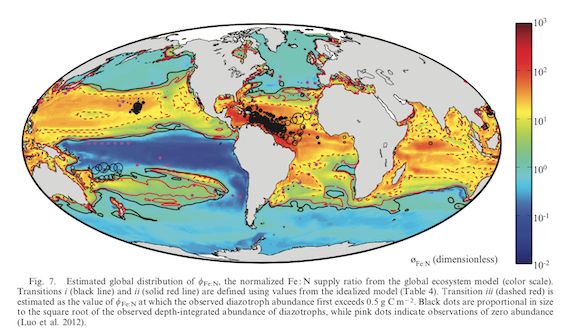

<img src="attachment:Screen Shot 2019-11-06 at 10.44.24 AM![image.png](attachment:image.png)" width="400">

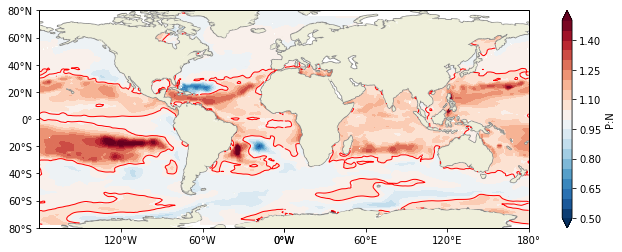

In [17]:
#%% Plot 1 nutrient at 1 depth

nut = 0    #chose nutrient here: 0=Fe, 1=N, 2=P
nutrient = [bio_PN_tot,bio_PN_trans,bio_PN_remin]
label_nut = ['N (mol/m$^{2}$/y)','P (mol/m$^{2}$/y)','Fe (mol/m$^{2}$/y)']
name_nut = ['P:N','transport P:N','remin P:N']

levs_PN = np.linspace(0.5,1.5,21)
levs_FeN = np.linspace(-2,2,21)
levs = [levs_PN,levs_FeN]

colmap = plt.get_cmap('RdBu_r')

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)},figsize=(12,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor=cfeature.COLORS['land']))
c = ax.contourf(lon,lat,nutrient[nut],levels=levs[nut],cmap=colmap,extend='both')
#con1 = ax.contour(lon,lat,nutrient[nut],levels=[0.99],colors='purple',linewidths=1,linstyle='solid')
con2 = ax.contour(lon,lat,nutrient[nut],levels=[1.04],colors='r',linewidths=1,linstyle='solid')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
cbar = plt.colorbar(c,ax=ax)
cbar.set_label(''+str(name_nut[nut])+'',rotation=90, position=(0.5,0.5))
plt.show()
#fig.savefig('/Users/meilers/MITinternship/Plots/overview_nutr_bioav_'+str(name_nut[nut])+'_104.png', bbox_inches='tight', dpi=300)

Compare to Dutkiewicz et al., 2019:

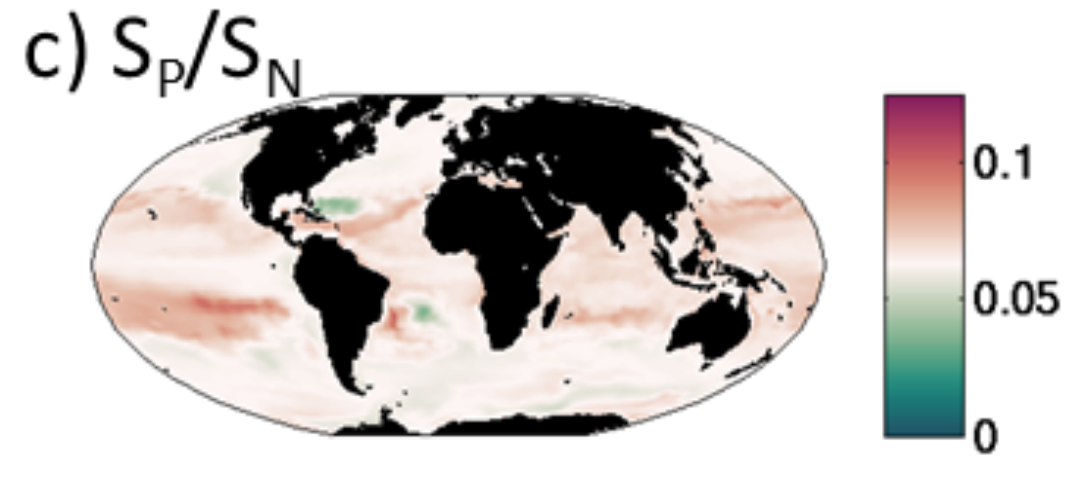

Compare to Ward et al., 2013:

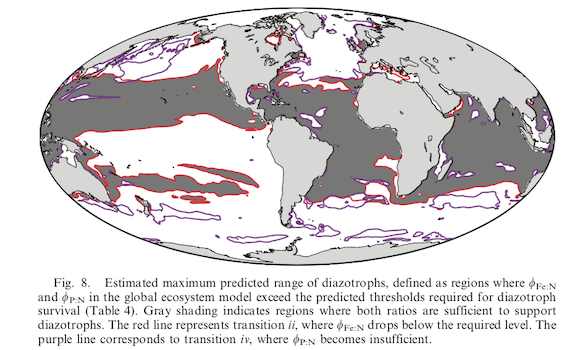

Show diazotroph data in map of predicted diazotroph biomes

No handles with labels found to put in legend.


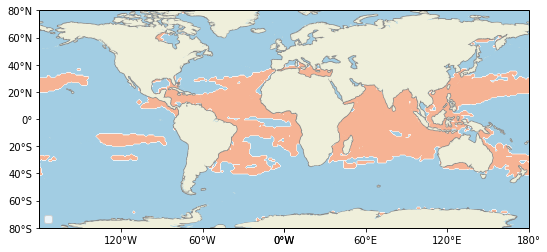

In [28]:
nu = 1   #chose nutrient here: 0=Fe, 1=N, 2=P
nutr = [bio_PN_tot,bio_FeN_tot,bio_PN_trans,bio_FeN_trans,bio_PN_remin,bio_FeN_remin]
label_nut = ['N (mol/m$^{2}$/y)','P (mol/m$^{2}$/y)','Fe (mol/m$^{2}$/y)']
name_nut = ['P:N','Fe:N','transport P:N','transport Fe:N','remin P:N','remin Fe:N']

levs_PN = np.linspace(0,1000,11)
levs_FeN = np.linspace(-1,2,21)
levs = [levs_PN,levs_FeN,levs_PN,levs_FeN,levs_PN,levs_FeN]

colmap = plt.get_cmap('RdBu_r')

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)},figsize=(12,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor=cfeature.COLORS['land']))
c = ax.contourf(lon,lat,mask,levels=levs[nu],cmap=colmap,extend='both')
#con1 = ax.contour(lon,lat,nutr[nu],levels=[1.2],colors='k',linewidths=1,linstyle='solid')
#con2 = ax.contour(lon,lat,nutr[nu],levels=[2.5],colors='r',linewidths=1,linstyle='solid')
#plt.plot(lon_d[find_obs[1]],lat_d[find_obs[0]],'.',color='b',label='observation')
#plt.plot(lon_d[find_abund[1]],lat_d[find_abund[0]],'.',color='c',label='abundance')
#plt.plot(lon_d[find_bm[1]],lat_d[find_bm[0]],'.',color='r')
#plt.plot(lon_d[find_nifH[1]],lat_d[find_nifH[0]],'.',color='m',label='nifH abundance')
#plt.plot(lon_d[find_nz_obs[1]],lat_d[find_nz_obs[0]],'.',color='m')
#plt.plot(lon_d[find_nz_abund[1]],lat_d[find_nz_abund[0]],'.',color='orange')
#plt.plot(lon_d[find_nz_bm[1]],lat_d[find_nz_bm[0]],'.',color='k')
#plt.plot(lon_d[find_nz_nifH[1]],lat_d[find_nz_nifH[0]],'.',color='w')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
ax.legend(loc='lower left')
#cbar = plt.colorbar(c,ax=ax)
#cbar.set_label(''+str(name_nut[nu])+'',rotation=90, position=(0.5,0.5))
plt.show()
fig.savefig('/Users/meilers/MITinternship/Plots/overview_nutr_bioav_diaz_noobs.png', bbox_inches='tight', dpi=300)

Correctly predicted presences:

In [19]:
dz_data_ls = [find_obs,find_abund,find_nifH]

In [20]:
list_idx = 7 #to chose which data from diaz_data_list to plot
for i in range(len(dz_data_ls)):
    lat_corr = dz_data_ls[i][0]
    lon_corr = (dz_data_ls[i][1]-180)%360
# gives fraction of abundances that are within the predicted province
    IN = np.sum(mask[lat_corr,lon_corr])/len(lat_corr)
    print("{0:.4f}".format(IN))
    print(len(lat_corr))

0.6642
679
0.7230
491
0.6524
187


#### Idea: vary P:N and/or Fe:N to optimize correctly predicted presences of diazotrophs

In [21]:
ref_PN = 1.04 # choose the reference value for the P:N ratio here (Ward et al. is 1.04)
new_PN = [0.99,1.09,0.7] # choose the new ratio for the comparison here
idx_P = 0

PN_area_ref = np.zeros((len(lat),len(lon)))
PN_bool_ref = np.where(bio_PN_tot[:,:] > ref_PN, 1, 0)
PN_A_ref = np.nansum(PN_bool_ref[:,:]*area,axis=(0,1))

PN_area_new = np.zeros_like(PN_area_ref)
PN_bool_new = np.where(bio_PN_tot[:,:] > new_PN[idx_P], 1, 0)
PN_A_new = np.nansum(PN_bool_new[:,:]*area,axis=(0,1))

change = (PN_A_ref-PN_A_new)/PN_A_ref
print(change)

-0.5239362553348375


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


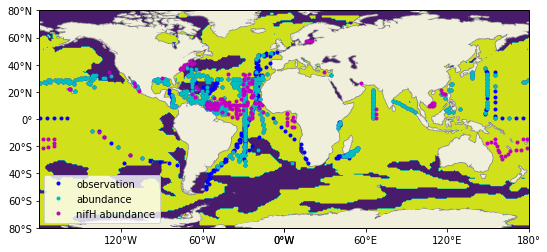

In [22]:
colmap = plt.get_cmap('RdBu_r')

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)},figsize=(12,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor=cfeature.COLORS['land']))
c = ax.contourf(lon,lat,PN_bool_new)#,levels=levs[nu],cmap=colmap,extend='both')
#con1 = ax.contour(lon,lat,nutr[nu],levels=[1.2],colors='k',linewidths=1,linstyle='solid')
#con2 = ax.contour(lon,lat,nutr[nu],levels=[2.5],colors='r',linewidths=1,linstyle='solid')
plt.plot(lon_d[find_obs[1]],lat_d[find_obs[0]],'.',color='b',label='observation')
plt.plot(lon_d[find_abund[1]],lat_d[find_abund[0]],'.',color='c',label='abundance')
#plt.plot(lon_d[find_bm[1]],lat_d[find_bm[0]],'.',color='r')
plt.plot(lon_d[find_nifH[1]],lat_d[find_nifH[0]],'.',color='m',label='nifH abundance')
#plt.plot(lon_d[find_nz_obs[1]],lat_d[find_nz_obs[0]],'.',color='m')
#plt.plot(lon_d[find_nz_abund[1]],lat_d[find_nz_abund[0]],'.',color='orange')
#plt.plot(lon_d[find_nz_bm[1]],lat_d[find_nz_bm[0]],'.',color='k')
#plt.plot(lon_d[find_nz_nifH[1]],lat_d[find_nz_nifH[0]],'.',color='w')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
ax.legend(loc='lower left')
#cbar = plt.colorbar(c,ax=ax)
#cbar.set_label(''+str(name_nut[nu])+'',rotation=90, position=(0.5,0.5))
plt.show()

In [23]:
ref_FeN = 1.2
new_FeN = [1.1,1.3,0.9]
idx_Fe = 0

FeN_area_ref = np.zeros((len(lat),len(lon)))
FeN_bool_ref = np.where(bio_FeN_tot[:,:] > ref_FeN, 1, 0)
FeN_A_ref = np.nansum(FeN_bool_ref[:,:]*area,axis=(0,1))

FeN_area_new = np.zeros_like(FeN_area_ref)
FeN_bool_new = np.where(bio_FeN_tot[:,:] > new_FeN[idx_Fe], 1, 0)
FeN_A_new = np.nansum(FeN_bool_new[:,:]*area,axis=(0,1))

change = (FeN_A_ref-FeN_A_new)/FeN_A_ref
print(change)

-0.36685062756752324


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


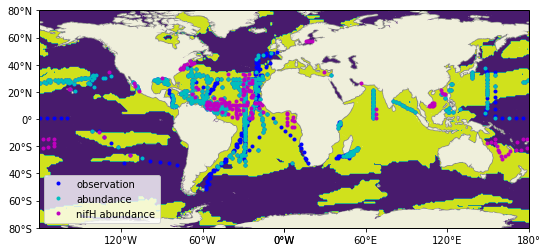

In [24]:
colmap = plt.get_cmap('RdBu_r')

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)},figsize=(12,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor=cfeature.COLORS['land']))
c = ax.contourf(lon,lat,FeN_bool_new)#,levels=levs[nu],cmap=colmap,extend='both')
#con1 = ax.contour(lon,lat,nutr[nu],levels=[1.2],colors='k',linewidths=1,linstyle='solid')
#con2 = ax.contour(lon,lat,nutr[nu],levels=[2.5],colors='r',linewidths=1,linstyle='solid')
plt.plot(lon_d[find_obs[1]],lat_d[find_obs[0]],'.',color='b',label='observation')
plt.plot(lon_d[find_abund[1]],lat_d[find_abund[0]],'.',color='c',label='abundance')
#plt.plot(lon_d[find_bm[1]],lat_d[find_bm[0]],'.',color='r')
plt.plot(lon_d[find_nifH[1]],lat_d[find_nifH[0]],'.',color='m',label='nifH abundance')
#plt.plot(lon_d[find_nz_obs[1]],lat_d[find_nz_obs[0]],'.',color='m')
#plt.plot(lon_d[find_nz_abund[1]],lat_d[find_nz_abund[0]],'.',color='orange')
#plt.plot(lon_d[find_nz_bm[1]],lat_d[find_nz_bm[0]],'.',color='k')
#plt.plot(lon_d[find_nz_nifH[1]],lat_d[find_nz_nifH[0]],'.',color='w')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
ax.legend(loc='lower left')
#cbar = plt.colorbar(c,ax=ax)
#cbar.set_label(''+str(name_nut[nu])+'',rotation=90, position=(0.5,0.5))
plt.show()

NameError: name 'Fe1' is not defined

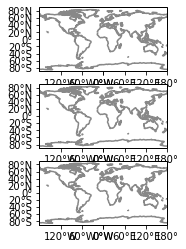

In [25]:
colmap = plt.get_cmap('RdBu_r')

fig,ax = plt.subplots(3,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)}, sharey=True, figsize=(12,4))
#ax.imshow(np.tile(np.array([[[224, 224, 224]]], dtype=np.uint8), [2, 2, 1]), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -180, 180])
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
for i in range(0,3):
    ax[i].coastlines(color='#888888',linewidth=1.5)
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    ax[i].set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
    ax[i].set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='#808080'))
c0 = ax[0].contourf(lon,lat,Fe1)#,levels=np.logspace(-14,2,num=2), cmap=cm.cm.haline, extend='max')
c1 = ax[1].contourf(lon,lat,Fe2)#,levels=np.logspace(-14,2,num=2), cmap=cm.cm.haline, extend='max')
c2 = ax[2].contourf(lon,lat,Fe3)#,levels=np.logspace(-14,2,num=2), cmap=cm.cm.haline, extend='max')
#ax.grid()
plt.colorbar(c0,ax=ax[0],orientation='vertical')
plt.colorbar(c1,ax=ax[1],orientation='vertical')
plt.colorbar(c2,ax=ax[2],orientation='vertical')
#fig.subplots_adjust(right=0.85)
#cb = fig.add_axes([0.9,0.25,0.01,0.5])
#fig.colorbar(c0,cax=cb,label='Depth (m)')
#cb.set_label('[m]',rotation=90, position=(0.5,1))
plt.show()